<a href="https://colab.research.google.com/github/sunkuvignesh21/AIML-PROJECT-2320040073/blob/main/Copy_of_AIML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("/content/Language Detection(Kaggle).csv")
data.head(10339)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
data["Language"].value_counts()

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [ ]:
X = data["Text"]
y = data["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the target variable for the test data
y_pred = model.predict(x_test) # this line was missing

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9758220502901354


In [ ]:
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[105   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  74   0   2   0   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0   0  97   2   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 277   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 205   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   1  84   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0  68   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 142   0   0   1   0   2   1   0   0]
 [  0   0   0   8   0   0   0   0   0  72   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0 126   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0 146   0   3   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0 140   1   0   0   0]
 [  0   1   0   0   0   0   0   0   1   0   0   2   0 157

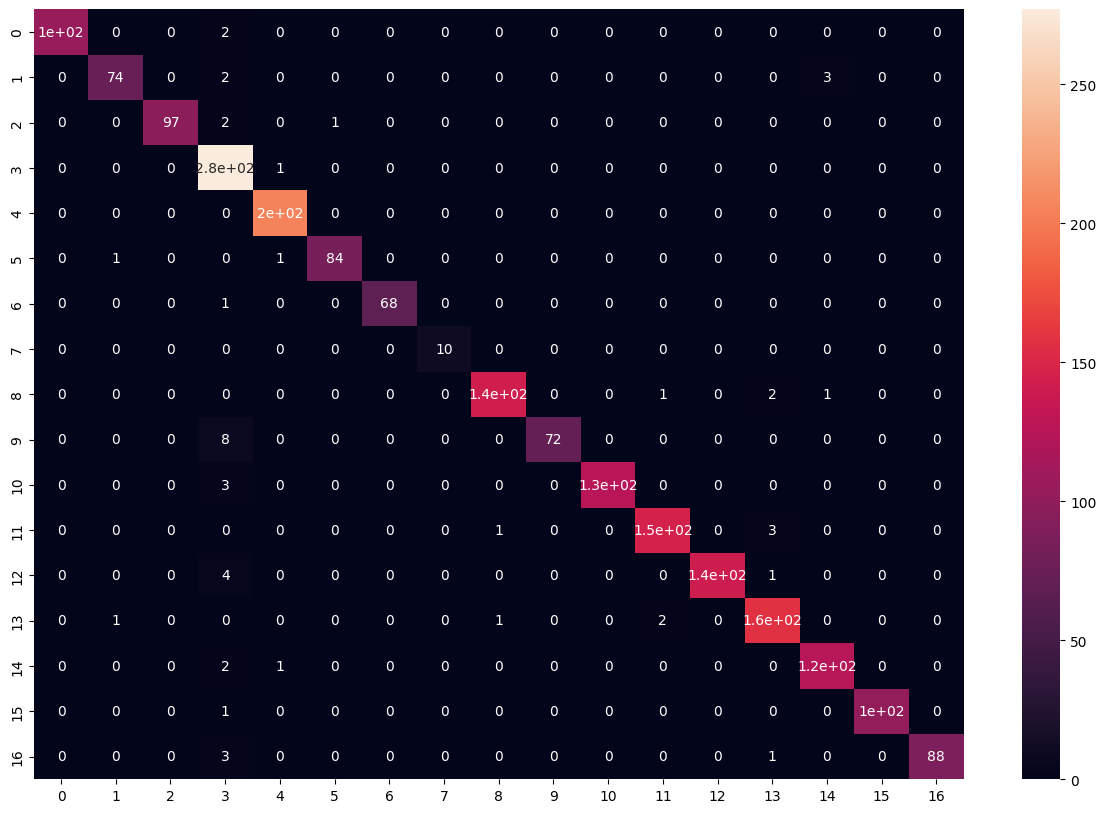

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [ ]:
predict('Su primer nÃºmero fue publicado el 4 de noviembre de 1869.')

The langauge is in Spanish
